In [1]:
import pandas as pd

In [41]:
store = pd.read_csv('store_rev.csv',index_col=0)

In [5]:
store.info()
#发现local_TV有空值
#发现event为类别型变量object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 845 to 26
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   revenue   985 non-null    float64
 1   reach     985 non-null    int64  
 2   local_tv  929 non-null    float64
 3   online    985 non-null    int64  
 4   instore   985 non-null    int64  
 5   person    985 non-null    int64  
 6   event     985 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 61.6+ KB


In [42]:
store.isnull().sum()

revenue      0
reach        0
local_tv    56
online       0
instore      0
person       0
event        0
dtype: int64

In [43]:
#处理缺失值，填充均值
store = store.fillna(store.local_tv.mean())

In [45]:
store.isnull().sum()

revenue     0
reach       0
local_tv    0
online      0
instore     0
person      0
event       0
dtype: int64

In [8]:
#数据分布
store.describe()

,revenue,reach,local_tv,online,instore,person
count,985.000000,985.000000,929.000000,985.000000,985.000000,985.000000
mean,38357.355025,3.395939,31324.061109,1596.527919,3350.962437,11.053807
std,11675.603883,1.011913,3970.934733,496.131586,976.546381,3.041740
min,5000.000000,0.000000,20000.000000,0.000000,0.000000,0.000000
25%,30223.600000,3.000000,28733.830000,1253.000000,2690.000000,9.000000
50%,38159.110000,3.000000,31104.520000,1607.000000,3351.000000,11.000000
75%,45826.520000,4.000000,33972.410000,1921.000000,4011.000000,13.000000
max,79342.070000,7.000000,43676.900000,3280.000000,6489.000000,24.000000


In [9]:
#了解event具体值
store.event.unique()

array(['non_event', 'special', 'cobranding', 'holiday'], dtype=object)

In [10]:
#revenue groupby event
store.groupby(['event'])['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
event,,,,,,,,
cobranding,398.0,38277.664497,11879.097324,7146.99,30472.1525,37864.155,46333.5600,79342.07
holiday,103.0,37791.890583,11942.369136,5000.00,29644.5250,38432.780,46036.1300,73377.15
non_event,192.0,37903.081562,11186.436740,6874.43,29852.3775,37937.175,44611.6375,69429.39
special,292.0,38964.136438,11648.616882,10207.96,30325.8125,39197.870,45897.0400,71757.50


In [11]:
#local_tv groupby event
store.groupby(['event'])['local_tv'].describe()

,count,mean,std,min,25%,50%,75%,max
event,,,,,,,,
cobranding,376.0,31424.590186,3951.049566,21252.35,28746.9725,31336.570,33839.0200,42162.64
holiday,96.0,30860.524896,4448.719364,21792.84,27769.6000,30564.705,33595.5975,41047.01
non_event,182.0,31415.197527,3952.155383,20000.00,29222.5875,31238.235,34386.0825,42069.84
special,275.0,31288.110982,3842.412128,21428.20,28668.7100,30921.790,34105.6250,43676.90


In [12]:
#online groupby event
store.groupby(['event'])['online'].describe()

,count,mean,std,min,25%,50%,75%,max
event,,,,,,,,
cobranding,398.0,1581.685930,495.166150,0.0,1239.50,1588.5,1913.00,3280.0
holiday,103.0,1569.543689,474.743001,217.0,1262.50,1535.0,1910.50,2628.0
non_event,192.0,1575.781250,501.246294,343.0,1230.00,1618.0,1932.25,2924.0
special,292.0,1639.917808,501.186626,319.0,1308.25,1650.0,1929.00,3105.0


In [13]:
#instore groupby event
store.groupby(['event'])['instore'].describe()

,count,mean,std,min,25%,50%,75%,max
event,,,,,,,,
cobranding,398.0,3282.537688,1011.834176,0.0,2556.00,3273.0,3991.75,6464.0
holiday,103.0,3482.242718,979.687240,684.0,2953.00,3517.0,4190.00,5572.0
non_event,192.0,3381.697917,1000.702032,569.0,2685.75,3341.0,4050.00,5893.0
special,292.0,3377.708904,905.760917,1024.0,2795.75,3408.0,3968.25,6489.0


In [14]:
#person groupby event
store.groupby(['event'])['person'].describe()

,count,mean,std,min,25%,50%,75%,max
event,,,,,,,,
cobranding,398.0,11.062814,2.976579,4.0,9.0,11.0,13.0,20.0
holiday,103.0,10.825243,3.270268,0.0,9.0,11.0,13.0,20.0
non_event,192.0,10.895833,2.912257,3.0,9.0,11.0,13.0,17.0
special,292.0,11.226027,3.133393,3.0,9.0,11.0,13.0,24.0


In [46]:
#将类别变量转化为哑变量
store = pd.get_dummies(store)
store.head()

,revenue,reach,local_tv,online,instore,person,event_cobranding,event_holiday,event_non_event,event_special
845,45860.28,2,31694.91,2115,3296,8,0,0,1,0
483,63588.23,2,35040.17,1826,2501,14,0,0,0,1
513,23272.69,4,30992.82,1851,2524,6,0,0,0,1
599,45911.23,2,29417.78,2437,3049,12,0,0,0,1
120,36644.23,2,35611.11,1122,1142,13,1,0,0,0


In [47]:
store.info()
#确定类别变量已经转换成数字变量

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985 entries, 845 to 26
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   revenue           985 non-null    float64
 1   reach             985 non-null    int64  
 2   local_tv          985 non-null    float64
 3   online            985 non-null    int64  
 4   instore           985 non-null    int64  
 5   person            985 non-null    int64  
 6   event_cobranding  985 non-null    uint8  
 7   event_holiday     985 non-null    uint8  
 8   event_non_event   985 non-null    uint8  
 9   event_special     985 non-null    uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 57.7 KB


In [48]:
#相关性
store.corr()[['revenue']].sort_values('revenue',ascending=False)
#发现local_tv,person,instore与revenue相关度高

,revenue
revenue,1.000000
local_tv,0.588349
person,0.559208
instore,0.311739
online,0.171227
event_special,0.033752
event_cobranding,-0.005623
event_holiday,-0.016559
event_non_event,-0.019155
reach,-0.155314


In [22]:
#可视化分析
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='local_tv', ylabel='revenue'>

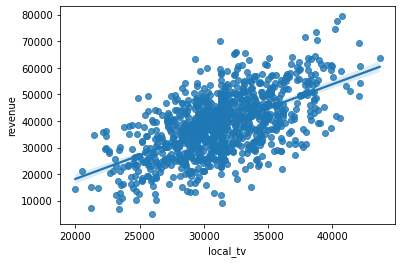

In [49]:
#revenue on local_tv
sns.regplot('local_tv','revenue',store)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='person', ylabel='revenue'>

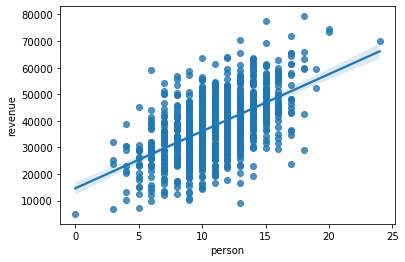

In [27]:
#revenue on person
sns.regplot('person','revenue',store)

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='instore', ylabel='revenue'>

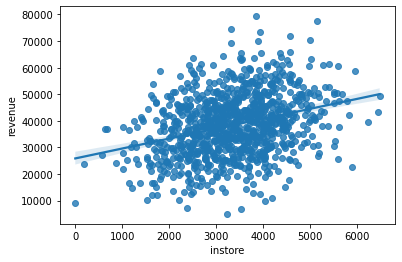

In [50]:
#revenue on instore
sns.regplot('instore','revenue',store)

In [51]:
#回归分析 
from sklearn.linear_model import LinearRegression

In [55]:
#建模
model=LinearRegression()

In [62]:
#设定自变量和因变量
y=store['revenue']
#第一次三个 
#x=store[['local_tv','person','instore']]
#第二次四个 
x=store[['local_tv','person','instore','online']]

In [63]:
model.fit(x,y)

LinearRegression()

In [58]:
#自变量系数
model.coef_

array([1.75153812e+00, 2.05057495e+03, 4.09032709e+00])

In [59]:
#模型的截距
model.intercept_

-52881.124390589284

In [61]:
#模型的评估，x为‘local_tv','person','instore'
score = model.score(x,y)
predictions = model.predict(x)
error = predictions - y #计算误差

rmse = (error**2).mean()**0.5
mae = abs(error).mean()

print(score)
print(rmse)
print(mae)

0.7457537640646816
5884.181391972567
4717.894766481711


In [64]:
#模型的评估，x为‘local_tv','person','instore','online'
score = model.score(x,y)
predictions = model.predict(x)
error = predictions - y #计算误差

rmse = (error**2).mean()**0.5
mae = abs(error).mean()

print(score)
print(rmse)
print(mae)

0.7703955973368737
5591.764749669004
4485.506383110865


In [65]:
from statsmodels.formula.api import ols

In [66]:
x=store[['local_tv','person','instore']]   #生成自变量
#x=store[['local_tv','person','instore','online']] 
y=store['revenue']

In [67]:
model=ols('y~x',store).fit()

In [69]:
#观察coef-系数，P值显著性
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     959.2
Date:                Fri, 25 Mar 2022   Prob (F-statistic):          4.09e-291
Time:                        14:18:36   Log-Likelihood:                -9947.5
No. Observations:                 985   AIC:                         1.990e+04
Df Residuals:                     981   BIC:                         1.992e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.288e+04   1804.489    -29.305      0.0